# Decision Tree

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("insurance.csv")

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [50]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

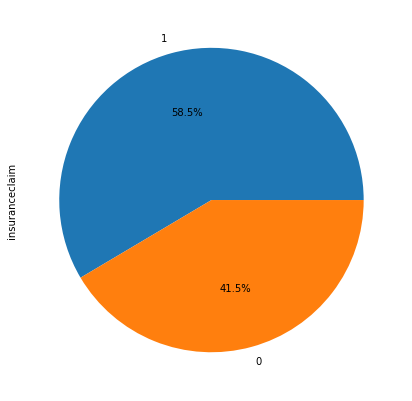

In [51]:
plt.figure(figsize=(7,7))
df["insuranceclaim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

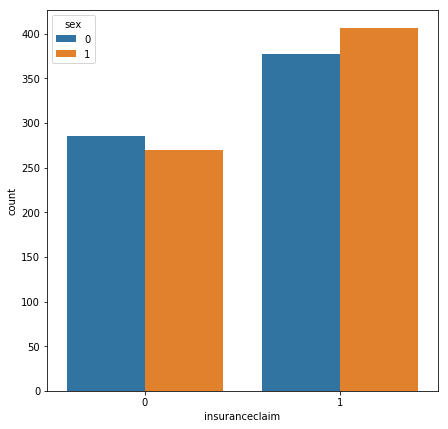

In [52]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()

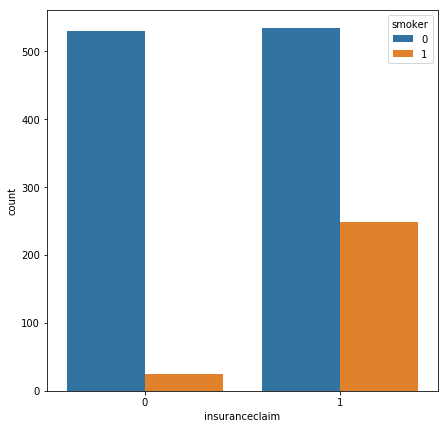

In [53]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

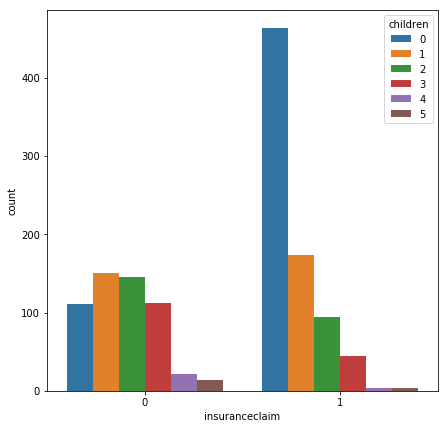

In [54]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

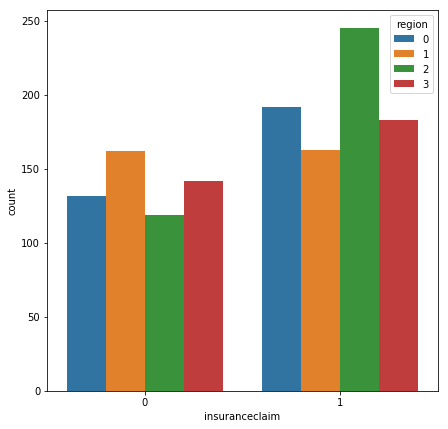

In [55]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

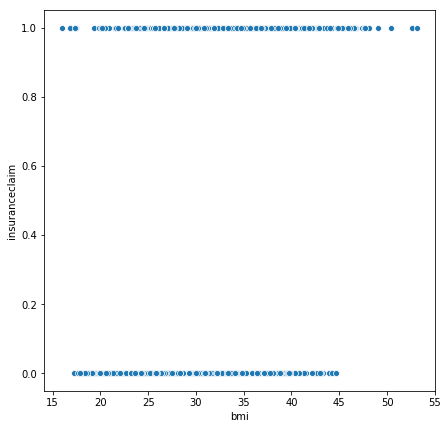

In [56]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

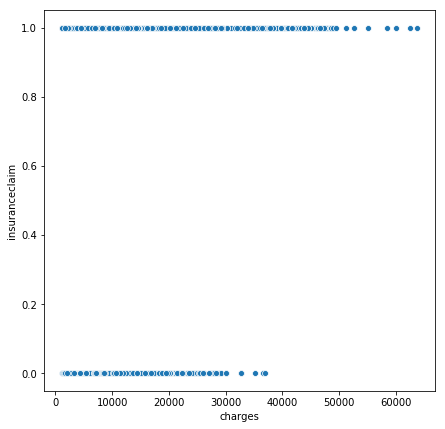

In [57]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

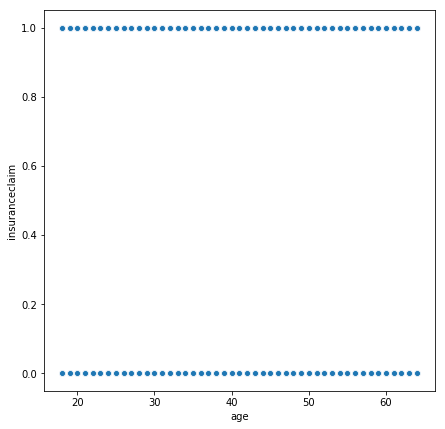

In [58]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="age",y="insuranceclaim")
plt.show()

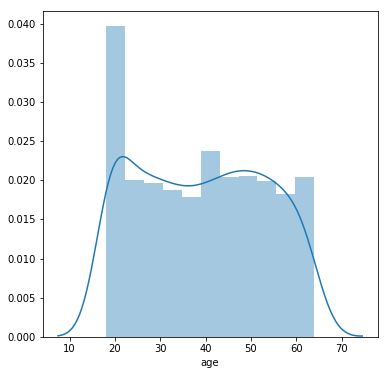

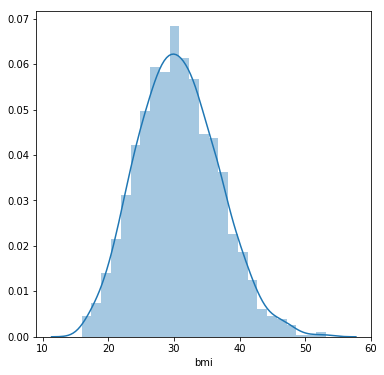

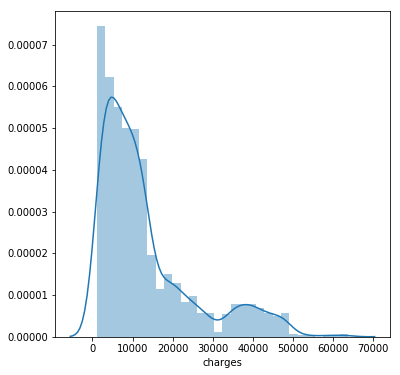

In [59]:
cols = ["age","bmi","charges"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

    

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [61]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [77]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    return model

def tree_plot(model):
    
    columns=list(X.columns)
    dot_data = tree.export_graphviz(model,out_file=None,feature_names=columns,class_names=True)
    graph = graphviz.Source(dot_data)
    graph.render("image",view=True)
    f = open("class.txt","w+")
    f.write(dot_data)
    f.close()



In [78]:
lr = LogisticRegression()

In [90]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

   micro avg       0.81      0.81      0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



In [80]:
dt = tree.DecisionTreeClassifier()

In [81]:
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

   micro avg       0.99      0.99      0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [82]:
tree_plot(dt)

#### Decision Tree with max_depth

In [83]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [85]:
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       157
           1       0.96      0.89      0.92       245

   micro avg       0.91      0.91      0.91       402
   macro avg       0.90      0.92      0.91       402
weighted avg       0.91      0.91      0.91       402



In [86]:
tree_plot(dt)

#### Decision Tree with min_sample_leaf

In [87]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)

In [88]:
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       157
           1       0.84      0.86      0.85       245

   micro avg       0.82      0.82      0.82       402
   macro avg       0.81      0.80      0.81       402
weighted avg       0.81      0.82      0.82       402



In [89]:
tree_plot(dt3)